# K-Means-Clustering

## Unüberwachtes Lernen: Clustering
    
Diese Woche liegt der Fokus auf dem Gebiet des unüberwachten Lernens. Wir werden mit Methoden des unüberwachten Lernens (engl. unsupervised learning) wie z. B. Clustering arbeiten. Sie werden (optional) lernen, warum und wie wir die Dimensionalität der Originaldaten reduzieren können und was die wichtigsten Ansätze zur Gruppierung ähnlicher Datenpunkte sind.  


### Einführung

Bislang haben wir Methoden des maschinellen Lernens weitgehend im Kontext des _überwachten_ Lernens vorgestellt.  Das heißt, wir haben über Datensätze für maschinelles Lernen gesprochen, die Eingaben $x$ und Ausgaben $y$ haben. Dabei ist das Ziel eines Algorithmus für maschinelles Lernen, zu lernen, wie man $y$ aus $x$ vorhersagen kann. Überwachtes Lernen dominiert traditionell die Mehrheit der praktischen Data-Science-Anwendungen. Aber in dieser Aufgabe werden wir Ansätze diskutieren, die von diesen abweichen. Insbesondere werden wir die Funktion des unüberwachten Lernens betrachten, bei dem uns _nicht_ entsprechende Eingabe/Ausgabe-Paare gegeben sind, sondern bei dem uns _nur_ die Eingaben $x$ gegeben sind. Im Vergleich zu Klassifizierungs- und Regressionsmethoden besteht der Grundsatz darin, dass die Eingabedaten unbeschriftet sind (d. h. es sind keine Labels oder Klassen gegeben). Das wirft natürlich die offensichtliche Frage auf: Wenn uns keine Zielausgabe gegeben wird, was genau sollen wir dann vorhersagen? Und tatsächlich ist die Aufgabe des unüberwachten Lernens auf einer gewissen Ebene mehrdeutig. Die allgemeine Philosophie des unüberwachten Lernens ist jedoch, dass wir eine Art von Struktur in den Daten entdecken wollen und dass der Algorithmus die Struktur der Daten ohne jegliche Hilfe erlernt. Verschiedene Methoden des unüberwachten Lernens arbeiten auf sehr unterschiedliche Weise und entdecken sehr unterschiedliche Arten von Strukturen, aber sie haben alle dieses ähnliche Element.

<div class="alert alert-block alert-success">
<b>Frage 3.4.1:</b> Was sind die beiden Hauptunterschiede hinsichtlich Datenerstellung und Training/Auswertung zwischen überwachtem und unüberwachtem Lernen?
Tipp: Denken Sie an die Eingabe und Ausgabe der beiden Kategorien!
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


## Clustering

In der vorherigen Teilaufgabe haben wir eine Kategorie von Modellen für unüberwachtes maschinelles Lernen untersucht: Die Dimensionalitätsreduktion. Nun werden wir zu einer anderen Klasse von unüberwachten maschinellen Lernmodellen übergehen: Clustering-Algorithmen. Die Hauptidee hinter Clustering ist ziemlich einfach. Clustering-Algorithmen versuchen, aus den Eigenschaften der Daten eine optimale Einteilung oder diskrete Kennzeichnung von Punktgruppen zu lernen. Im Grunde genommen sagen wir uns: "Ich habe hier diese Punkte, und ich denke, dass sie sich in Gruppen organisieren. Es wäre schön, diese Dinge konkreter zu beschreiben und, wenn ein neuer Punkt hinzukommt, ihn der richtigen Gruppe zuzuordnen." Diese allgemeine Idee ermutigt zur Exploration und eröffnet eine Vielzahl von Algorithmen für das Clustering.
<br>
<br>
<figure><img align="center" src="https://habrastorage.org/getpro/habr/post_images/8b9/ae5/586/8b9ae55861f22a2809e8b3a00ef815ad.png"><figcaption>*Beispiele für Ergebnisse von verschiedenen Algorithmen aus scikit-learn*</figcaption></figure>

Die oben aufgeführten Algorithmen decken nicht alle Clustering-Methoden ab, aber sie sind die am häufigsten verwendeten. Heute werden wir näher auf das K-Means-Clustering eingehen, welches der beliebteste Clustering-Algorithmus ist.

### K-means clustering


Als erstes Beispiel für einen unüberwachten Lernalgorithmus im Bereich des Clustering betrachten wir den K-Means-Clustering-Algorithmus. Der k-means-Algorithmus ist der beliebteste und gleichzeitig einfachste aller Clustering-Algorithmen. Bevor wir jedoch die formale Definition und Funktion vorstellen, betrachten wir das k-means Clustering aus einem eher visuellen/geometrischen Blickwinkel. Einfach als eine Möglichkeit, Datenpunkte zu clustern. Das Ziel des k-means-Algorithmus ist es, eine Menge von $k$ "Zentren" innerhalb eines unbeschrifteten mehrdimensionalen Datensatzes zu finden (d. h. Punkte $\mu^{(i)} \in \mathbb{R}^n$), wobei $k$ eine vorher festgelegte Zahl ist. Dies wird durch eine einfache Vorstellung davon erreicht, wie das optimale Clustering aussieht:

- Das "Clusterzentrum" ist das arithmetische Mittel aller zum Cluster gehörenden Punkte.
- Jeder Punkt ist näher an seinem eigenen Clusterzentrum als an anderen Clusterzentren.

Diese beiden Annahmen sind die Grundlage des **k**-Mittelwertmodells. Auf diese Weise können wir auch jeden Punkt mit seinem nächstgelegenen Zentrum assoziieren und dies als Hinweis darauf verwenden, zu welchem Cluster er gehört. Mit einem *k*-Means-Modell sind wir also auch in der Lage, neue Datenpunkte zu klassifizieren.

Und so funktioniert es:

**Algorithmus**: K-means

**Gegeben:** Datensatz $x^{(i)}, i=1,\ldots,m$

**Initialisieren Sie:**
1. Wählen Sie die Anzahl von Clustern $k$, die Sie für optimal halten.  
   
2. Initialisieren Sie $k$ Punkte als "Zentroide" zufällig im Raum unserer Daten.  
    $\mu^{(j)} := \mbox{RandomChoice}(x^{(1:m)}), \; j=1,\ldots,k$  

**Wiederholen Sie den Vorgang bis zur Konvergenz:**
3. Ordnen Sie jede Beobachtung ihrem nächstgelegenen Schwerpunkt zu.  
    $y^{(i)} := argmin_j \|\mu^{(j)} - x^{(i)}\|_2^2, \; i=1,\ldots,m$
4. Aktualisieren Sie die Zentroide auf den Mittelpunkt aller zugewiesenen Beobachtungssätze.   
    $\displaystyle \mu^{(j)} := \sum_{i=1}^m \frac{x^{(i)} \mathrm{1}\{y^{(i)} = j\}}{\mathrm{1}\{y^{(i)} = j\}}, \;\; j=1,\ldots,k$
5. Wiederholen Sie die Schritte 3 und 4 bis alle Zentroide stabil sind (d. h. sich in Schritt 4 nichts mehr ändert).

Was ist die _Verlustfunktion_, die wir hier optimieren? Es ist die Summe der Abstände jedes Punktes zu seinem nächstgelegenen Schwerpunkt. Obwohl wir dies hier nicht formal beweisen werden, steht fest, dass der Algorithmus bei jedem Schritt die Verlustfunktion _verringert_ (die Intuition ist, dass jeder Schritt, sowohl die Neuzuordnung von Clustern als auch die Berechnung neuer Zentren, nur den Gesamtverlust verringern kann, und daher wird der Gesamtverlust nur auf diese Weise verringert).  Da es außerdem nur eine endliche Anzahl möglicher Clusterungen gibt (natürlich exponentiell groß, aber immer noch endlich), wissen wir, dass der Algorithmus nach einer endlichen Anzahl von Schritten konvergiert (d. h. die Clusterzuweisungen bleiben von einer Iteration zur nächsten konstant, was bedeutet, dass sich die Zentren ebenfalls nicht ändern und der Algorithmus einen Fixpunkt erreicht hat).


In der folgenden Abbildung können Sie sehen, was in jeder Iteration des k-Means-Algorithmus passieren sollte.
<figure><img align="center" src="images/expectation-maximization.png"></figure>

<div class="alert alert-block alert-success">
<b>Frage 3.4.2:</b> Beschreiben Sie in Ihren eigenen Worten, was bei der Verwendung von k-Means passiert.
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


### Entwickeln einer einfachen k-Means-Implementierung
Zunächst einmal müssen wir alle benötigten Bibliotheken und unsere Daten laden. Wir beginnen mit den Standard-Importen: numpy, pyplot, seaborn und scikitlearn-datasets.

In [ ]:
# Import numpy, pyplot, datasets
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display
import ipywidgets as widgets
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

Als nächsten Schritt wollen wir einen zweidimensionalen Datensatz erzeugen, der vier verschiedene Blobs enthält. Wir werden den folgenden Satz von 300 Datenpunkten verwenden. Um zu verdeutlichen, dass es sich um einen unüberwachten Algorithmus handelt, lassen wir die Beschriftungen in der Visualisierung weg.

In [ ]:
from sklearn.datasets import make_blobs
RANDOM_STATE = 42
X_blob, y_blob = make_blobs(
    n_samples=300, centers=4,cluster_std=0.60, random_state=RANDOM_STATE, shuffle=True
)
plt.scatter(X_blob[:, 0],X_blob[:, 1], s=50);

<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.3:</b> Füllen Sie den folgenden Code aus, um eine einfache Implementierung von k-Means selbst zu schreiben!
<ul>
<li> Initialisieren Sie k Punkte als "Zentroide" zufällig mit RandomState
<li> Dann wiederholen Sie die Schrittzuweisung, aktualisieren die Zentroide und prüfen die Konvergenz

</li>
</ul>
</div>

In [ ]:
# use the following import to simplify the implementation
from sklearn.metrics import pairwise_distances_argmin

# 1. Select the number of clusters: This has to be done before the function is called
# rseed is the seed for generation of random numbers
def find_clusters(X: np.ndarray, n_clusters: int, rseed: int):

    # 2. Initialize k points as "centroids" randomly
    # Please initialize the random number generator with specified random state
    # STUDENT CODE HERE

    # STUDENT CODE until HERE
    # return the cluster centers and the labels
    return centers, labels

#### Analysieren von Blob-Daten

<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.4:</b> Verwenden Sie Ihre Funktion, um ein Clustering der oben erzeugten Daten zu berechnen. Der zufällige Seed ist bereits festgelegt. Visualisieren Sie die gefundenen Clusterbeschriftungen mit verschiedenen Farben. Da wir die Daten selbst generiert haben, wissen wir, wie viele Cluster wir finden wollen. Welchen Wert müssen wir also für k angeben?


</div>

In [ ]:
RANDOM_STATE = 42
# STUDENT CODE HERE

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage 3.4.5:</b> Experimentieren Sie mit dem Zufallsgenerator. Was beobachten Sie? Was könnten wir tun, um dies zu überwinden?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Analysieren eines weiteren synthetischen Datensatzes
Wir haben unseren ersten Datensatz mit der Funktion *make_blobs* erzeugt. Um ein besseres Gefühl für die Eigenschaften von k-Means zu bekommen, wollen wir die Ergebnisse mit einem weiteren Datensatz analysieren. Wir importieren die Funktion *make_moons* aus sklearn datasets und erzeugen einen weiteren Datensatz, bestehend aus 300 Datenpunkte. Der Rauschwert $0.05$, um eine gewisse Abweichung in unserem Datensatz einzubeziehen.



<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.6:</b> Verwenden Sie Ihre Funktion zum Clustern der Daten und suchen Sie nach zwei Clustern. Zeigen Sie das Ergebnis in einem Streudiagramm.

</div>

In [ ]:
from sklearn.datasets import make_moons
X_moon, y_moon = make_moons(300, noise=.05, random_state=RANDOM_STATE)
# STUDENT CODE HERE

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.7:</b> Was fällt Ihnen auf? Können Sie erklären, warum dies geschieht? Welche Bedingung des k-Means-Algorithmus führt zu diesem Ergebnis?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
<b>Frage 3.4.8:</b> Was passiert, wenn wir den Wert von k auf vier statt auf zwei setzen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


Ob das Ergebnis aussagekräftig ist, ist eine Frage, die schwer zu beantworten ist. In den folgenden Aufgaben werden wir verschiedene Ansätze kennenlernen.

### Evaluieren eines Clusterings

Wie bereits zu Beginn der heutigen Session erwähnt, ist die Auswertung von Clustering-Ergebnissen schwierig. Bei den synthetischen Datensätzen, die wir oben erzeugt haben, haben wir gelabelte Daten, da die Blobs / Monde als vorgegebene Klassen (Cluster) gesehen werden können. Wir können die Übereinstimmung unserer Clustering-Ergebnisse mit dem gegebenen Label überprüfen. Aber im Allgemeinen verwenden wir unüberwachte Methoden, wenn wir keine Labels für unsere Daten haben. Was können wir also tun, wenn es kein Label zum Überprüfen gibt? Wir sind nur dann in der Lage, unser Clustering zu evaluieren, wenn wir ein Maß für die Qualität eines Clusterns definieren können. Die Auswertung eines Clustering gibt Aufschluss darüber, nach wie vielen Clustern gesucht werden soll. Es gibt *interne* und *externe* Gütemetriken. Externe Metriken verwenden die Informationen über die bekannte wahre Aufteilung (wir haben Labels), während interne Metriken keine externen Informationen verwenden und die Güte von Clustern nur auf Basis der Ausgangsdaten bewerten. Die optimale Anzahl von Clustern wird normalerweise in Bezug auf einige interne Metriken definiert.

#### Verwenden von gegebenen Labels in einer einfachen Tabelle
Zunächst verwenden wir die gegebenen Informationen der Labels. Zu diesem Zweck können wir die __cross-tabulation__ verwenden, die eine Methode zur quantitativen Analyse der Beziehung zwischen mehreren Variablen bereitstellt. In unserem Fall sind die beiden Variablen unsere Labels und die geschätzten Cluster.

<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.9:</b>
<ul>
<li> Abrufen der Listen der Clustering-Ergebnisse für den Blob-Datensatz und die Label Daten
<li> Verwenden Sie die Bibliothek *pandas*, um die cross-tabulation durchzuführen.
<li> Setzen Sie den Index und die Spalten der Tabelle richtig. Der Index sollte den echten / realen Cluster anzeigen, und die Spalte sollte beschreiben, welchem Cluster die Punkte zugeordnet wurden.
</li>
</ul>
</div>

In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Fragen 3.4.10:</b> Entsprechen die Cluster den realen Klassen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Messung der Clustering-Qualität ohne Etiketten: Silhouetten-Koeffizient

Im Gegensatz zu der oben beschriebenen Metrik impliziert der Silhouettenkoeffizient nicht das Wissen über die wahren Labels der Objekte. Er ermöglicht es uns, die Qualität des Clustering nur anhand der anfänglichen, nicht gelabelten Datenpunkte und des Clustering-Ergebnisses zu schätzen. Zu Beginn wird für jede Beobachtung der Silhouettenkoeffizient berechnet. Sei $a$ der Mittelwert des Abstands eines Objekts zu anderen Objekten innerhalb eines Clusters und $b$ der mittlere Abstand eines Objekts zu Objekten des nächstgelegenen Clusters (der sich von dem unterscheidet, zu dem das Objekt gehört). Dann sei das Silhouettenmaß für dieses Objekt $$s = \frac{b - a}{\max(a, b)}.$$

Die Silhouette eines Datenpunktes ist ein Mittelwert der Silhouettenwerte aus diesem Datenpunkt. Der Silhouettenabstand zeigt also an, wie stark sich der Abstand zwischen den Objekten der gleichen Klasse vom mittleren Abstand zwischen den Objekten aus verschiedenen Clustern unterscheidet. Dieser Koeffizient nimmt Werte im Bereich $[-1, 1]$ an. Werte nahe bei -1 entsprechen schlechten Clustering-Ergebnissen, während Werte näher bei 1 dichten, gut definierten Clustern entsprechen. Je höher also der Silhouettenwert ist, desto besser sind die Ergebnisse des Clusterns.

<div class="alert alert-block alert-success">
<b>Frage 3.4.11:</b> Berechnen Sie den Silhouettenkoeffizienten und erhalten Sie das Ergebnis für die oben ausgewählten Blobdaten mit dem entsprechenden Wert für k. Welche Schlussfolgerung können wir hier ziehen? Tipp: Verwenden Sie die scikit-learn-Bibliothek für die Berechnung.
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

### Clustering mit scikit-learn Implementation

Nachdem wir unsere eigene Implementierung von K-means analysiert haben, können wir nun die von scikit-learn vorgegebene Implementierung verwenden. Das eingebaute K-Means verwendet standardmäßig die Initialisierung von KMeans++. Weitere Details zu dieser Initialisierungsprozedur finden Sie im Anhang. Um konsistente und reproduzierbare Ergebnisse zu erhalten, müssen wir nur den Zufallszustand angeben, wie wir es in unserer eigenen Version getan haben. Ein Vorteil von scikit-learn ist, dass wir mit einer eingebauten Funktion direkt Cluster-Labels für neue Datenpunkte schätzen können. Dabei werden die neuen Datenpunkten den vorhandenen Clustern zugeordnet. Da sich k-means den Mittelwert jedes Clusters (die "Zentroide") merkt, ist es möglich, zu jeder neuen Probe den nächstgelegenen Zentroid zu finden und das entsprechende Label zuzuweisen.

Nun beginnen wir, die Ergebnisse von oben mit scikit-learn zu reproduzieren. Wir werden auswerten, ob wir im Blob-Datensatz die gleichen Cluster wie zuvor finden.


<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.12:</b>
<ul>
<li> Importieren Sie KMeans aus sklearn.cluster.
<li> Erstellen Sie mit <code>KMeans()</code> eine KMeans-Instanz, um die richtige Anzahl von Clustern zu finden. Um die Anzahl der Cluster anzugeben, verwenden Sie das Schlüsselwort-Argument n_clusters.
<li> Verwenden Sie die Methode <code>.fit()</code> von model, um das Modell an das Array von Punkten anzupassen.
<li> Verwenden Sie die Methode <code>.predict()</code> des Modells, um die Cluster-Labels unseres Datensatzes vorherzusagen, und weisen Sie das Ergebnis den Labels zu
</li>
</ul>
</div>

In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE
#plotting is given
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=labels_blob,
            s=50, cmap='viridis');

<div class="alert alert-block alert-success">
<b>Frage 3.4.13:</b> Was beobachten Sie? Welchen Unterschied können Sie erkennen, wenn Sie die Ergebnisse unserer eigenen Implementierung und der scikit-learn-Lösung vergleichen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


### Wählen Sie einen geeigneten Wert für $k$
Eine offensichtliche Frage, die sich bei der Verwendung von K-Means stellt, ist: Wie wählt man die Hyperparameter für den Algorithmus, wie z. B. die Anzahl der Zentren $k$? Im Allgemeinen haben wir nur die Datenpunkte und den Cluster, dem sie zugeordnet sind. Nun brauchen wir ebenso Metriken, die von den Datenpunkten abhängen, um den perfekten Wert für $k$ auszuwählen.



#### Verwendung des Silhouette-Koeffizienten
Eine Möglichkeit ist die Verwendung des Silhouettenkoeffizienten, den wir oben eingeführt haben. Mit Hilfe der Silhouette können wir die optimale Anzahl von Clustern $k$ identifizieren (wenn wir sie nicht schon aus den Daten kennen), indem wir die Anzahl von Clustern nehmen, die den Silhouettenkoeffizienten maximiert.


<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.14:</b> Berechnen Sie den Silhouettenkoeffizienten für verschiedene Werte von k und wählen Sie die optimale Zahl! Der Code zum Plotten verschiedener ks (eine Reihe von k-Hyperparametern) versus dem Score wurde für Sie bereits geschrieben, füllen Sie also nur noch den Rest des Codes aus.


</div>

In [ ]:
def calculate_k_silhouette(X:np.ndarray, k_min:int, k_max:int):
# STUDENT CODE HERE

# STUDENT CODE until HERE
    return ks, scores

In [ ]:
#set random state
RANDOM_STATE = 42
# call your function with a suitable range for k
# STUDENT CODE HERE

# STUDENT CODE until HERE
# Plot ks vs silhouette coefficient
plt.plot(ks, silhouette_scores, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Silhouette Score')
plt.xticks(ks)
plt.show()

<div class="alert alert-block alert-success">
<b>Frage 3.4.15:</b> Welche Anzahl von Clustern sollten wir entsprechend dem Silhouetten-Score wählen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Verwendung der Ellenbogenmethode
Ein gutes Clustering hat enge Cluster und die Datenpunkte in jedem Cluster sind zusammengeballt. Daher können wir die Streuung jedes Clusters bewerten, wobei eine geringere Streuung besser ist. K-means optimiert von Natur aus die Summe der quadratischen Abstände zwischen den Beobachtungen und ihren Zentren. Dies ist die *Verlustfunktion* für den k-Means-Algorithmus.

$$ J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,$$




Wir können die Verlustfunktion als Qualitätsmaß verwenden. Das scheint vernünftig zu sein -- wir wollen, dass unsere Beobachtungen so nah wie möglich an ihren Zentren liegen. Bewerten Sie nun, was das Qualitätsmaß über die Verlustfunktion für verschiedene Werte von $k$ anzeigt!

<div class="alert alert-block alert-success">
<b>Aufgabe 3.4.16:</b> Der Code zum Plotten verschiedener ks gegen den Verlust wurde bereits für Sie geschrieben, füllen Sie also den Rest des Codes aus. Die wichtigsten Schritte sind:
<ul>
<li> Definieren Sie die Liste der k-Werte
<li> Führen Sie für jeden der Werte von k die folgenden Schritte aus:
    <ul>
        <li>1. Anpassen eines K-Means-Modells an die gegebenen Datenproben mit k Clustern
        <li>2. Berechnen Sie den Verlust
</li>
</ul>
</li>
</ul>
</div>

In [ ]:
def calculate_k_loss(X:np.ndarray, k_min:int, k_max:int):
# STUDENT CODE HERE

# STUDENT CODE until HERE
    return ks, losses

In [ ]:
#set random state
RANDOM_STATE = 42
# call your function with a suitable range for k
# STUDENT CODE HERE

# STUDENT CODE until HERE
# Plot ks vs inertias
plt.plot(ks, losses, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('$ J(C)$')
plt.xticks(ks)
plt.show()

<div class="alert alert-block alert-success">
<b>Frage 3.4.17:</b> Welches Problem haben wir, wenn wir nur versuchen, den Verlust $J(C_k)$ zu minimieren?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>



<div class="alert alert-block alert-success">
<b>Frage 3.4.18:</b> Was können wir tun, um dieses Problem zu vermeiden? Wie viele Cluster sollten wir dann in unserem Fall wählen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>







Zusammenfassend lässt sich sagen, dass die Auswahl der Anzahl von Clustern typischerweise eine wage Kunst ist und es _sehr_ schwierig ist, aus der Ausführung von k-means etwas über die "wirkliche" Anzahl von Clustern in den Daten abzuleiten (tatsächlich sollten Sie dies niemals versuchen).

### Mean-Shift Clustering

Mean-Shift Clustering ist ein Schwerpunkt basierter Algorithmus. Hierbei wird der Schwerpunkt über das relative Auftreten der Datenpunkte definiert. Dies bedeutet in der Praxis, das kreisförige Strukturen gesucht werden, die so im Bild liegen, dass möglichst viele Datenpunkte in der Struktur liegen. Kritisch hierbei ist die Größe der Struktur, die auch als _Bandwith_ bezeichnet wird. In der Praxis werden ganz viele solcher Strukturen, die zufällig im Bild verteilt werden, berechnet und bei Überlappung verschmolzen. Dies hat den Vorteil, dass im Gegensatz zu k-Means die Anzahl an Clustern nicht vorgegeben werden muss. Dafür ist der Algorithmus langsamer.   

Gegeben sind nun die bereits bekannten Blob-Daten:

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
RANDOM_STATE = 42
X_blob, y_blob = make_blobs(
    n_samples=300, centers=4,cluster_std=0.60, random_state=RANDOM_STATE, shuffle=True
)
plt.figure(figsize=(15,10))
plt.scatter(X_blob[:, 0],X_blob[:, 1], s=50)
plt.show()

<div class="alert alert-block alert-success">
    <b>Aufgabe 3.4.19:</b> Verwenden Sie <code>sklearn</code> um die Daten mittels Mean-Shift Clustering zu Clustern und speichern Sie das Ergebnis in einer Variablen mit dem Namen <code>predicted_labels</code>.
    
    
_Hinweis: Verweden Sie <code>sklearn.cluster.MeanShift</code> und eine <code>bandwidth</code> von 4._
</div>

In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE
plt.figure(figsize=(15,10))
plt.scatter(
    X_blob[:, 0], X_blob[:, 1], c=predicted_labels
)
plt.show()

<div class="alert alert-block alert-success">
    <b>Frage 3.4.20:</b> Was passiert, wenn Sie die <code>bandwith</code> auf 0.4 bzw. 40 statt 4 setzten
</div>

<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


### DBSCAN

Auch DBSCAN arbeitet dichtebasiert. Diesem Verfahren liegt die Annahme zugrunde, dass Cluster Orte hoher Dichte sind, die durch Bereiche niedriger Dichte voneinander getrennt werden. Hierzu werden sogenannte _Core Samples_ bestimmt. Hierbei handelt es sich um Datenpunkte, die in einem sehr dichten Bereich liegen. Somit wird die Position eines Clusters von seinen Core Samples bestimmt. Daraus folgt ebenso, dass die Core Samples eines Clusters nah beieinander liegen. Anschließend werden die verbleibenden nicht - Core Samples dem naheliegensten Cluster zugewiesen, sofern diese nicht zu weit entfernt von den Core Samples liegen. Somit kann es Datenpunkte geben, die keinem Cluster zugeordnet werden.
DBSCAN besitzt i.d.R. zwei Parameter, nämlich:

1.) Die Mindestanzahl an Datenpunkte für einen Cluster sowie

2.) Epsilon, welches welches den maximalen Abstand zwischen zwei Datenpunkten, die im gleichen Cluster liegen, angibt.



Gegeben seien wieder die bekannten Blob-Daten:

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
RANDOM_STATE = 42
X_blob, y_blob = make_blobs(
    n_samples=300, centers=4,cluster_std=0.60, random_state=RANDOM_STATE, shuffle=True
)
plt.figure(figsize=(15,10))
plt.scatter(X_blob[:, 0],X_blob[:, 1], s=50)
plt.show()

<div class="alert alert-block alert-success">
    <b>Aufgabe 3.4.21:</b> Verwenden Sie <code>sklearn</code> um die Daten mittels DBSCAN zu Clustern und speichern Sie das Ergebnis in einer Variablen mit dem Namen <code>predicted_labels</code>.
    
    
_Hinweis: Verweden Sie <code>sklearn.cluster.DBSCAN</code>, mit <code>eps=0.5</code> und <code>min_samples=5</code>_
</div>

In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE
plt.figure(figsize=(15,10))
plt.scatter(
    X_blob[:, 0], X_blob[:, 1], c=predicted_labels
)
plt.show()
print('Number of classes: {}'.format(len(list(filter(lambda x: x != -1 , set(predicted_labels))))))

<div class="alert alert-block alert-success">
    <b>Frage 3.4.22:</b> Was passiert, wenn Sie die <code>min_samples</code> auf 1 bzw. 10 statt 5 setzen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
    <b>Frage 3.4.23:</b> Was passiert, wenn Sie die <code>eps</code> auf 0.1 bzw. 1.0 statt 0.5 setzen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


### HDBSCAN

HDBSCAN ist eine Erweiterung DBSCAN, bei dem, stark vereinfacht, die Berechnung von Epsilon sowie die Anzahl an Datenpunkten pro Cluster, auf Kosten der Laufzeit, automatisiert wurde.

Gegeben sei der bekannte Blob-Datensatz:

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
RANDOM_STATE = 42
X_blob, y_blob = make_blobs(
    n_samples=300, centers=4,cluster_std=0.60, random_state=RANDOM_STATE, shuffle=True
)
plt.figure(figsize=(15,10))
plt.scatter(X_blob[:, 0],X_blob[:, 1], s=50)
plt.show()

<div class="alert alert-block alert-success">
    <b>Aufgabe 3.4.24:</b> Verwenden Sie <code>hdbscan</code> mit den Parametern <code>min_cluster_size=5</code> (minimale Anzahl an Datenpunkten die einen Cluster bilden) sowie <code>min_samples=None</code> (Steuert die Anzahl an DAtenpunkten, die keiner Klasse zugeordnet werden können), um die Daten mittels HDBSCAN zu Clustern und speichern Sie das Ergebnis in einer Variablen mit dem Namen <code>predicted_labels</code>.
    
    
_Hinweis: Verweden Sie <code>hdbscan.HDBSCAN</code>, welches das gleiche Interface wie die die vorherigen Methoden besitzt._
    
_Hinweis 2: Sollten Sie die Aufgabe lokal ausführen, müssen Sie die Bibliothek <code>hdbscan</code> installieren. Dies können Sie in der Anaconda Promt mittels "conda install -c conda-forge hdbscan" durchführen._
</div>

In [ ]:
from hdbscan import HDBSCAN

# STUDENT CODE HERE

# STUDENT CODE until HERE
plt.figure(figsize=(15,10))
plt.scatter(
    X_blob[:, 0], X_blob[:, 1], c=predicted_labels
)
plt.show()
print('Number of classes: {}'.format(len(list(filter(lambda x: x != -1 , set(predicted_labels))))))

<div class="alert alert-block alert-success">
    <b>Frage 3.4.25:</b> Was passiert, wenn Sie die <code>min_cluster_size</code> auf 10 bzw. 100 statt 5 setzen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
    <b>Frage 3.4.26:</b> Was passiert, wenn Sie die <code>min_samples</code> auf 1, 10 bzw. 100 statt 5 setzen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


### Praktische Anwendung - Bildkomprimierung

Im folgenden sollen die genannten Algorithmen praktisch an einem Beispielbild ausprobiert werden, d.h. wir werden im folgenden die Bildkompression mittels Clustering betrachten.

Das Ursprungsbild sieht wie folgt aus:

In [ ]:
# NICHT ÄNDERN
from skimage import io
import os
import matplotlib.pyplot as plt

path_to_image = os.path.join('images', 'Lamas_0.png')
image = io.imread(path_to_image)

plt.figure(figsize=(15,10))
plt.imshow(image)
plt.show()

Nun wird das gezeigte Bild mittels KMeans komprimiert.

**Achtung: Die Berechnung kann etwas Zeit in anspruch nehmen.**

In [ ]:
from skimage import img_as_float
from sklearn.cluster import  KMeans
import numpy as np

# Bild-Dimensionen
rows = image.shape[0]
cols = image.shape[1]

# Bilddimension ändern
image_reshaped = image.reshape(rows*cols, 3)

# k-means
model = KMeans(n_clusters=4)
model.fit(image_reshaped)

# neues Bild erzeugen
compressed_image = model.cluster_centers_[model.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

# In Ursprungsdimension konvertieren
compressed_image = compressed_image.reshape(rows, cols, 3)

plt.figure(figsize=(15,10))
plt.imshow(compressed_image)
plt.show()

<div class="alert alert-block alert-success">
    <b>Aufgabe 3.4.27:</b> Komprimieren Sie <code>image</code> mittels <code>MeanShift</code> äquivalent zu dem Beispiel mit <code>KMeans</code>. Verwenden Sie hierbei eine <code>bandwidth</code> von 8 und übergeben <code>bin_seeding=True</code> (dies beschleunigt die Berechnung).  
    
_Hiweise: Verwenden Sie zum speichern des Cluster-Verfahrens eine Variable mit dem Namen <code>model</code>._
</div>

In [ ]:
from skimage import img_as_float
import numpy as np

# Bild-Dimensionen
rows = image.shape[0]
cols = image.shape[1]

# Bilddimension ändern
image_reshaped = image.reshape(rows*cols, 3)

# STUDENT CODE HERE

# STUDENT CODE until HERE


# neues Bild erzeugen
compressed_image = model.cluster_centers_[model.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

# In Ursprungsdimension konvertieren
compressed_image = compressed_image.reshape(rows, cols, 3)

plt.figure(figsize=(15,10))
plt.imshow(compressed_image)
plt.show()

## Optionale Themen

Alles Nachfolgende in diesem Notebook ist optional.

## Optionales Thema - Principal Component Analysis (PCA)

Wie bereits erwähnt, gibt es verschiedene Anwendungsbereiche für unüberwachte Lernalgorithmen.  Eine der häufigsten Aufgaben beim unüberwachten Lernen ist die Dimensionalitätsreduktion. Hier ist das Ziel, die Daten zu vereinfachen, ohne zu viele Informationen zu verlieren. Mehrere korrelierende Merkmale können zu einem zusammengefasst werden. Zum Beispiel korreliert der Kilometerstand eines Autos mit seinem Alter, so dass ein Algorithmus zur Dimensionalitätsreduktion beide zu einem Merkmal kombinieren kann, das die Abnutzung des Fahrzeugs darstellt. Dies wird auch als Merkmalsextraktion bezeichnet. Visualisierungsalgorithmen sind ein weiteres gutes Beispiel für unüberwachtes Lernen: Man gibt ihnen eine Menge komplexer Daten ohne Beschriftungen und erhält eine 2-D- oder 3-D-Darstellung der Daten, die man leicht grafisch darstellen kann. Solche Algorithmen versuchen, die Struktur der Daten so gut wie möglich zu erhalten (z. B. verhindern sie, dass sich Cluster in den Eingabedaten in der Visualisierung überlappen), damit Sie leichter verstehen können, wie die Daten strukturiert sind, und möglicherweise auf unerwartete Muster stoßen.

Heute werden wir die Hauptkomponentenanalyse verwenden, um Datensätze zu visualisieren und ihre Dimensionalität zu reduzieren.

### Intuition, Theorien und Anwendungsfragen

Die Principal Component Analysis ist eine der einfachsten, intuitivsten und am häufigsten verwendeten Methoden zur Dimensionalitätsreduktion, bei der Daten auf ihren orthogonalen Merkmalsunterraum projiziert werden. Orthogonaler Unterraum bedeutet, dass wir einen Merkmalsraum aus Linearkombinationen unserer ursprünglichen Merkmale erstellen. Wie im Originalraum sind die neu konstruierten Features orthogonal zueinander. Es wird zunächst die Hyperebene gefunden, die den Daten am nächsten liegt, und dann werden die Daten auf diese Ebene projiziert.

Aber gehen wir einen Schritt zurück: Was ist überhaupt ein Merkmalsraum und warum wollen wir die "Dimensionalität" unserer Daten reduzieren? In den meisten Fällen kann jeder Datenpunkt in unserem Datensatz im Wesentlichen als ein Vektor mit einer gewissen Anzahl von Elementen dargestellt werden. Der Raum, der alle diese Vektoren umfasst (z. B. $\mathbb{R}\times\mathbb{R}\times\mathbb{R}$, wenn alle unsere Vektoren jeweils 3 Elemente haben), wird als Merkmalsraum bezeichnet. In realen Fällen werden wir oft eine große Anzahl von Dimensionen haben, was Analysen (sowohl manuell als auch mit Computerunterstützung) schwierig macht. Wenn wir einen Weg finden, die Anzahl der Dimensionen zu reduzieren, ohne Informationen zu verlieren, wird unser Leben sehr viel einfacher. Um dies in realen Fällen zu erreichen, gibt es verschiedene Algorithmen, wie z. B. die hier verwendete PCA, die Wege finden, die Merkmale (Vektorelemente) in einen neuen, deutlich kleineren Satz von Merkmalen zu transformieren, ohne dabei viel Information zu verlieren.
Schließlich bedeutet die Tatsache, dass es Linearkombinationen verwendet, nur, dass jede Komponente für unseren neuen Vektor aus einer gewichteten Summe der ursprünglichen Komponenten besteht. Zum Beispiel könnte die erste Komponente unserer Ausgabe aus den drei Komponenten unseres Eingabevektors über $(x^{\text{pca}})_0 = 0,27 * (x^{\text{input}})_0 - 4,21 * (x^{\text{input}})_1 + 1,31 * (x^{\text{input}})_2$ gebildet werden. Das Schöne daran ist, dass diese Transformationen unglaublich schnell zu berechnen sind und als eine einzige Matrixmultiplikation ausgedrückt werden können.

<table class="image">
<caption align="bottom"> Auswahl eines Subraums für die Projektion [Geron, 2018]</caption>
<tr><td><img src='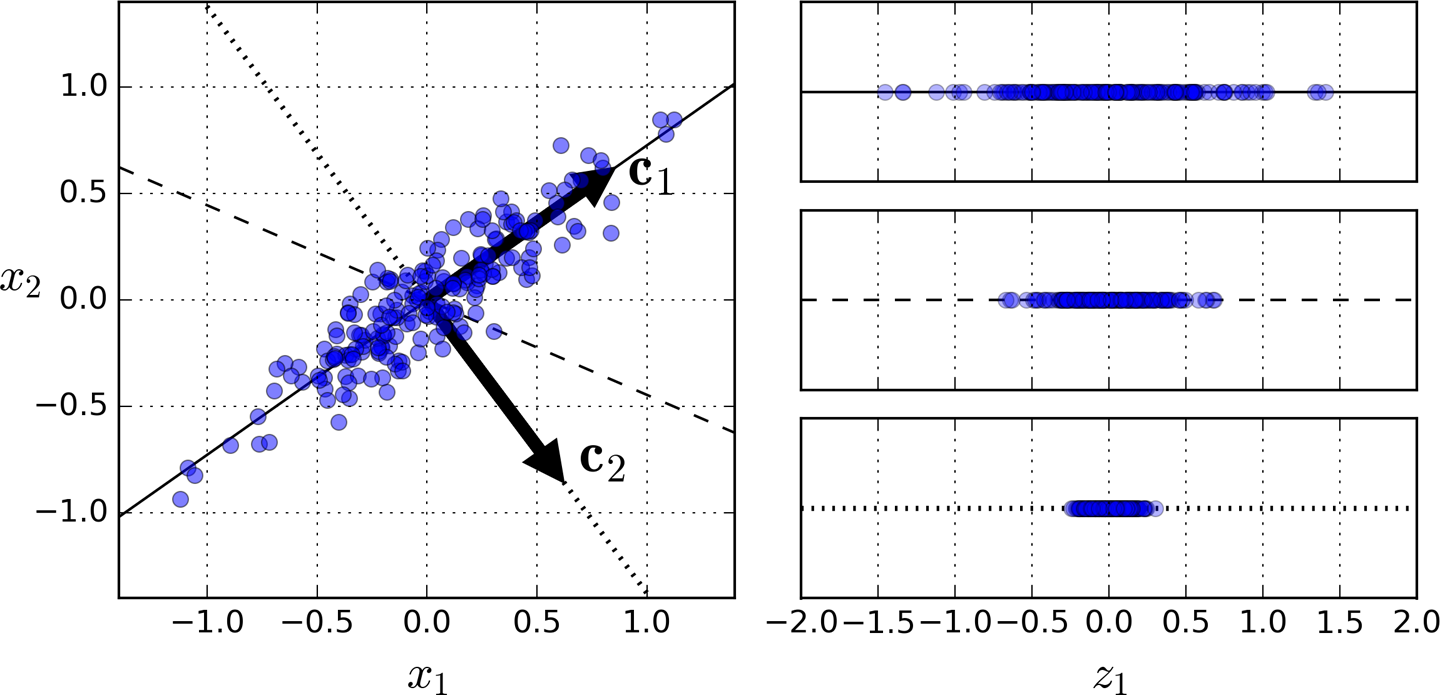' width=70% /></td></tr>
</table>



Als Beispiel zeigt die obige Abbildung auf der linken Seite einen einfachen 2-D-Datensatz mit drei verschiedenen Achsen (d.h. eindimensionalen Hyperebenen). Auf der rechten Seite sehen Sie die Projektionen des Datensatzes auf jede dieser Achsen. Wie Sie sehen können, behält die Projektion auf der durchgezogenen Linie die maximale Varianz, während die Projektion auf der gestrichelten Linie sehr wenig Varianz behält. Die Projektion auf der gestrichelten Linie liegt irgendwo dazwischen.

Es erscheint sinnvoll, die Achse so zu wählen, dass ein Maximum an Varianz erhalten bleibt, da weniger Informationen verloren gehen als bei den anderen Projektionen. Die Auswahl lässt sich auch damit begründen, dass der mittlere quadratische Abstand zwischen dem ursprünglichen Datensatz und der Projektion minimal ist. Dieser einfache Grundgedanke ist die Essenz der Principal Component Analysis: Die PCA versucht, durch Minimierung des Rekonstruktions- (Projektions-) Fehlers die erste Hauptkomponente zu finden, die gleichzeitig die Varianz der projizierten Daten maximiert.

<img align=right src='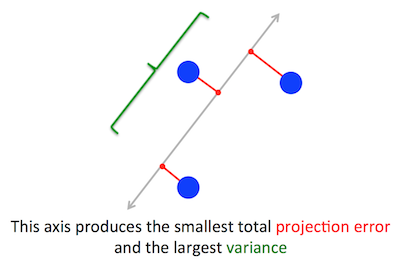' width="400"/>

Die PCA sucht nach der Achse, auf der die größte Varianz der Trainingsdaten liegt. Es wird auch eine Achse orthogonal zur ersten Achse gefunden, die der größten verbleibenden Varianz entspricht. In einem höherdimensionalen Datensatz würde die PCA auch eine dritte Achse finden, die orthogonal zu den beiden vorherigen Achsen ist, dann eine vierte Achse, eine fünfte Achse und so weiter - so viele Achsen, wie der Datensatz Dimensionen hat. Der Einheitsvektor, der die $i^{th}$-Achse definiert, wird $i^{th}$ Hauptkomponente (PC) genannt. In der Abbildung ist die 1. Hauptkomponente $c_1$ und die zweite $c_2$.

Allgemeiner ausgedrückt können alle Beobachtungen als ein Ellipsoid in einem Unterraum eines anfänglichen Merkmalsraums betrachtet werden, und die neue Basismenge in diesem Unterraum wird an den Ellipsoidachsen ausgerichtet. Diese Annahme ermöglicht es, stark korrelierte Merkmale zu entfernen, da die Vektoren der Basismengen orthogonal sind.
Im allgemeinen Fall stimmt die resultierende Ellipsoid-Dimensionalität mit der Dimensionalität des Ausgangsraums überein, aber die Annahme, dass unsere Daten in einem Unterraum mit einer kleineren Dimension liegen, erlaubt es uns, den "übermäßigen" Raum mit der neuen Projektion (Unterraum) abzuschneiden. Wir erreichen dies auf eine "gierige" Art und Weise, indem wir nacheinander jede der Ellipsoid-Achsen auswählen, indem wir feststellen, wo die Streuung (Varianz) maximal ist.


> "To deal with hyper-planes in a 14 dimensional space, visualize a 3D space and say 'fourteen' very loudly. Everyone does it." - Geoffrey Hinton



Werfen wir einen Blick auf die mathematische Formulierung dieses Prozesses:

Um die Dimensionalität unserer Daten von $n$ auf $k$ mit $k \leq n$ zu verringern, sortieren wir unsere Liste von Achsen in der Reihenfolge abnehmender Streuung und nehmen die obersten $k$ davon.

Aber wie kann ich die Principal Components für einen Trainingsdatensatz finden?

Wir beginnen mit der Berechnung der Varianz und der Kovarianz der ursprünglichen Features. Dies wird normalerweise mit der Kovarianzmatrix durchgeführt. Gemäß der Kovarianzdefinition wird die Kovarianz zweier Features wie folgt berechnet: $$cov(X_i, X_j) = E[(X_i - \mu_i) (X_j - \mu_j)] = E[X_i X_j] - \mu_i \mu_j,$$ wobei $\mu_i$ der Erwartungswert des $i$-ten Merkmals ist. Es ist erwähnenswert, dass die Kovarianz symmetrisch ist, und die Kovarianz eines Vektors mit sich selbst gleich seiner Varianz ist.

Daher ist die Kovarianzmatrix symmetrisch mit der Varianz der entsprechenden Merkmale auf der Diagonalen. Nicht-diagonale Werte sind die Kovarianzen des entsprechenden Merkmalspaares. In Bezug auf Matrizen, bei denen $\mathbf{X}$ die Matrix der Beobachtungen ist, lautet die Kovarianzmatrix wie folgt:

$$\mathbf{C} = E[(\mathbf{X} - E[\mathbf{X}]) (\mathbf{X} - E[\mathbf{X}])^{T}]$$

Im Fall von zwei Dimensionen:

$$ \Large \mathbf{C} = \begin{pmatrix}
\sigma_{X_1}^2 & cov(X_1, X_2)    \\
 cov(X_2, X_1) & \sigma_{X_2}^2   \\
\end{pmatrix} $$
Wenn wir einen mittelwertzentrierten Datensatz haben ($\mu =0$), vereinfacht sich die Berechnung zu

$\Large \mathbf{C} = \frac{\mathbf{X}\cdot \mathbf{X}^T}{n-1}$.

Erinnern Sie sich nun daran, was die PCA erreichen will: Maximierung der Varianz im projizierten Raum. Genauso gesprochen:
Wenn $\mathbf{X}$ die Datenmatrix ist, dann ist die Projektion auf den Vektor $w$ gegeben durch $\mathbf{X}w$ und ihre Varianz ist
$$\Large \sigma_w^2 =  \frac{1}{n−1}(\mathbf{X}w)^T \cdot\mathbf{X}w=w^T\cdot (\frac{1}{n−1}\mathbf{X}^T\mathbf{X})\cdot w=w^T \mathbf{C} w$$.

Kurze Zusammenfassung: Matrizen, als lineare Operatoren, haben Eigenwerte und Eigenvektoren. Sie sind sehr praktisch, weil sie Teile unseres Raums beschreiben, die nicht rotieren und sich nur dehnen, wenn wir lineare Operatoren auf sie anwenden; Eigenvektoren bleiben in der gleichen Richtung, werden aber um einen entsprechenden Eigenwert gedehnt. Formal erfüllt eine Matrix $\mathbf{M}$ mit Eigenvektor $v_i$ und Eigenwert $\lambda_i$ diese Gleichung: $\mathbf{M} v_i = \lambda_i v_i$.
Da unsere Kovarianzmatrix $ \mathbf{C} $ symmetrisch ist, können wir sie diagonalisieren, indem wir ein neues orthogonales Koordinatensystem wählen, das durch die Eigenvektoren der Kovarianzmatrix $ \mathbf{C} $ gegeben ist. Die Kovarianzmatrix im neuen Raum sieht so aus:
$$ \Large \mathbf{C_{EV}} = \begin{pmatrix}
\lambda_1 & 0  \\
0 & \lambda_2  \\
\end{pmatrix} $$
Die neue Kovarianzmatrix ist also diagonal, die Dimensionen sind unkorreliert ($ cov(EV_1, EV_2) = 0 $) und die Eigenwerte $\lambda_i$ liegen auf der Diagonalen. Setzt man dies oben in $\sigma_w^2$ ein (wir wollen das maximieren), ergibt sich:
$$ \Large \sigma_w^2 =  w^T \mathbf{C}_{EV} w = \Sigma_i \lambda_i w^2_i$$
In der neuen orthogonalen Basis ist die Varianz durch die gewichtete Summe der Eigenwerte gegeben. Folglich wird die maximal mögliche Varianz erreicht, wenn wir einfach die Projektion auf die erste Koordinatenachse nehmen. Daraus folgt, dass die Richtung der ersten Principal Components durch den ersten Eigenvektor der Kovarianzmatrix gegeben ist.
Fasst man alle Eigenvektoren in einer Matrix zusammen, erhält man
$$\Large \mathbf{V} = \begin{pmatrix}
\mid & \mid & & \mid \\
{\bf v}_{1} & {\bf v}_{2} & \cdots & {\bf v}_{n}\\
\mid & \mid & & \mid \\
\end{pmatrix}$$
Die Principal Components, die wir aus den Daten erhalten wollen, sind nur die Eigenvektoren, die den obersten-$k$ größten Eigenwerten der Matrix entsprechen. Die PCA setzt voraus, dass der Datensatz um den Koordinatenursprung zentriert ist, was notwendig ist, um zu gewährleisten, dass die erste Principal Components (erster Eigenvektor) in der Achse mit maximaler Varianz liegt. Andernfalls kann die erste Principal Components nur auf den Mittelwert des Datensatzes zeigen.

Die nächsten Schritte sind einfacher zu verdauen. Wir multiplizieren die Matrix unserer Daten $\mathbf{X}$ mit diesen Komponenten, um die Projektion unserer Daten auf die orthogonale Basis der gewählten Komponenten zu erhalten. Wenn die Anzahl der Komponenten kleiner war als die anfängliche Raumdimensionalität, denken Sie daran, dass wir bei Anwendung dieser Transformation einige Informationen verlieren werden.

Wenn wir die Mathematik von oben als Pseudocode formulieren, erhalten wir die







**Pseudocode für PCA**

. Definieren Sie $k<d$ - als neue Dimensionalität
2. Mittelwert-Zentrierung von $X$ durchführen:

3. Berechnen Sie die Kovarianzmatrix $\mathbf{C}$ von $\mathbf{X}$

4. Führen Sie die Eigenwertzerlegung der Kovarianzmatrix so durch, dass:
    $$ \mathbf{C} \cdot v_i = \lambda_i \cdot v_i $$
    
5. Sortieren Sie die Eigenvektoren $v_i$ in absteigender Reihenfolge ihrer Eigenwerte $\lambda_i$, um $V \in \mathbb{R}^{d\times d}$ zu erhalten

6. Wählen Sie die obersten-$k$ Eigenvektoren als Hauptkomponenten
 $$V = \begin{pmatrix}
v_{1,1} & \cdots & v_{1,k} \\
 \vdots & & \vdots \\\
 v_{d,1} & &v_{d,k} \\
\end{pmatrix} \in \mathbb{R}^{d \times k} $$
6. Rückgabe $$\Large Z = XV \in \mathbb{R}^{m \times k}$$
7. Verlust gegeben durch
  - $\Large \sum_{i=k+1}^n \lambda_i$ ("verlorene" Varianz) oder
  
  - $\lVert \mathbf{X} - \mathbf{X}ww^T\rVert^2$ (Reprojektionsfehler)

### Entwickeln einer PCA-Implementierung

In dieser Aufgabe wollen wir eine eigene einfache PCA-Implementierung realisieren und das Funktionsprinzip verstehen.

#### Verstehen der PCA mit dem Iris-Datensatz
Beginnen wir mit dem Datensatz, den wir in Aufgabe 2 verwendet haben, dem Iris-Datensatz. Dazu müssen wir zunächst alle benötigten Bibliotheken und unsere Daten laden.

In [ ]:
# Imports
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import decomposition
from IPython import display
%matplotlib inline
import seaborn as sns
import ipywidgets as widgets

plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

Second, we load the [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) flower data set from the csv file, just as in task 2. The sepal length is shown versus the petal width of the flowers.

In [ ]:
# Load dataset
filename = 'data/iris.data.csv'
names = ['Sepal-length', 'Sepal-width', 'Petal-length', 'Petal-width', 'Class']
X = pd.read_csv(filename, names=names)
# split label info
y = X.Class
# drop labels from data
X = X.drop(['Class'],axis=1)
plt.scatter(X['Sepal-length'],X['Petal-width'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal width')

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Wie Sie vielleicht sehen, haben wir Zielwerte (aka Labels) für unsere Daten, also könnten wir auch überwachte Methoden verwenden. Aber wir können die Labels auch im unüberwachten Kontext verwenden, was wir später sehen werden.

</div>

Der nächste Schritt in unserem Analyseprozess wäre eine Erkundung unseres Datensatzes mit verschiedenen Statistiken und Diagrammen. Da wir dies in Aufgabe 3 mit dem Titanic-Datensatz bereits getan haben, überspringen wir diesen Schritt.

Danach können wir unsere Daten für die Verwendung der PCA vorbereiten. Nach Schritt zwei des Pseudocodes der PCA ist es notwendig, unsere Daten zu zentrieren.

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Füllen Sie die folgenden Zeilen aus, um den Vorbereitungsschritt durchzuführen. Benennen Sie den <strong>zentrierten</strong> Datensatz
    <strong>X_centered</strong>.


</div>

In [ ]:
# center X by mean
# STUDENT CODE HERE

# STUDENT CODE until HERE

Wenn Sie das Diagramm von oben betrachten, vermuten Sie, dass die Kelchblattlänge und die Blütenblattbreite korreliert sind.

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Um dies zu bestätigen, berechnen Sie ihre Pearson-Korrelation.


</div>

In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage:</b> Bekommen Sie einen Beweis für Ihre Aussage, wenn Sie sich den Korrelationswert ansehen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


Um eine bessere Vorstellung von der PCA zu bekommen, wollen wir zunächst das Funktionsprinzip zeigen. Deshalb haben wir ein interaktives Widget erstellt. Das Widget zeigt ein Scatterplot der Kelchblattlänge und der Blütenblattbreite unseres Datensatzes. Die Daten werden auf die ausgewählte Achse projiziert, die als schwarze durchgezogene Linie dargestellt wird. Die Achse der Projektion kann mit dem Schieberegler oberhalb des Bildes eingestellt werden, der den Winkel der Linie steuert. Der Verlust der Projektion (Reprojektionsfehler) wird ebenfalls berechnet.

In [ ]:
#### DO NOT EDIT
def projectionError(pointsOrig,projectionMatrix):
    pointsProjected = pointsOrig.dot(projectionMatrix).dot(projectionMatrix.T)
    sumSquaredDistance = sum(sum((pointsProjected-pointsOrig)**2))
    projErr = sumSquaredDistance/len(pointsOrig)
    return projErr
def varianceProjected(pointsOrig, projectionMatrix):
    z = pointsOrig.dot(projectionMatrix)
    return np.var(z[:,0])
def printLossGain(pointsOrig,projectionMatrix):
    print("Projection Error: {:0.4f}".format(projectionError(pointsOrig,projectionMatrix)))
    print("Projected Variance: {:0.4f}".format(varianceProjected(pointsOrig,projectionMatrix)))

In [ ]:
#### DO NOT EDIT
###PCA###drawing
def update_pca_2D(X,alpha):
    #plt.figure(2,figsize=(8,8))
    plt.cla()
    w = np.array([np.cos(np.deg2rad(alpha)), np.sin(np.deg2rad(alpha))]).reshape(2,1)
    z = X.dot(w).dot(w.T)
    for i in range(0,100):
        plt.plot([X[i,0], z[i,0]], [X[i,1], z[i,1]], c='r',aa=False)

    plt.plot(w[0]*3.5*np.array([-1, 1]), w[1]*3.5*np.array([-1, 1]), c='k',aa=False)
    plt.plot(-w[1]*2*np.array([-1, 1]), w[0]*2*np.array([-1, 1]), c=(.6 ,.6, .6),aa=False)

    plt.scatter(z[:,0], z[:,1], c='r')
    plt.scatter(X[:,0], X[:,1], c='b')
    sct = plt.scatter(0,0,65,c='k',linewidth= 2)
    #plt.setp(sct,mfc = (1, 1 ,1), mec = (0, 0, 0))
    printLossGain(X,w)
    minval = min(min(X[:,0]),min(X[:,1]))
    maxval = max(max(X[:,0]),max(X[:,1]))
    plt.xlim([minval, maxval])
    plt.ylim([minval, maxval])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal width')
    #plt.show()

In [ ]:
#### DO NOT EDIT
###PCA###drawing

plt.figure()
X0 = X_centered[['Sepal-length','Petal-width']]
interactive_plot = widgets.interactive(update_pca_2D,
         alpha=widgets.FloatSlider(min=-90, max=90, step=0.2, layout=widgets.Layout(width='90%')),
                               X=widgets.fixed(X0.values))
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

<div class="alert alert-block alert-success">
<b>Frage:</b>  Stellen Sie nun den Wert von alpha so ein, dass die Varianz maximiert wird. Was bemerken Sie bezüglich des Projektionsfehlers, und welchen Winkel erhalten wir für die schwarze Linie?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
<b>Frage:</b> Wo in der Abbildung ist unsere erste Principal Component angegeben? Nennen Sie eine mögliche erste Hauptkomponente. Was zeigt die graue Linie an?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
<b>Frage:</b>  Erläutern Sie den Verlust und wie wir hier einen Verlust machen. Was ist der Zusammenhang zwischen der ersten Principal Component und der Varianz?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Implementieren der PCA-Funktion.
Verwenden Sie den angegebenen Pseudocode, um eine PCA durchzuführen. Füllen Sie dazu die Lücken im nachfolgenden Code.

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Verwenden Sie den oben angegebenen Pseudocode (siehe Pseudocode für PCA) in dieser Aufgabe, um eine PCA durchzuführen. Erledigen Sie dazu die hier angegebenen Teilaufgaben.
<ul>
<li> Berechnen Sie die Kovarianzmatrix. Sehen Sie sich die Definition von <code>np.cov()</code> an. Welche Operation ist notwendig?
<li> Führen Sie die Eigenwertzerlegung durch
<li> Sortieren Sie die Spalten von V mit den Eigenwerten w. Tipp: Verwenden Sie die Methode <code>.argsort()</code>, um die Indizes für die Sortierung von V und w zu erhalten
<li> Berechnen Sie den Verlust über Eigenwerte
</li>
</ul>
</div>

In [ ]:
def pca_own(X,k):
    """ Calculates the Principal Component Analysis of X
        Args:
            X : correctly scaled matrix of data, each row is an observation
            k (int) : number of components selected for the output.
        Returns:
            w : k eigenvalues
            V : the matrix of k principal components
            loss: the error made by using only k components as feature space
    """
    # Tip: use the argsort() function to get the indices for sorting of V
    # STUDENT CODE HERE

    # STUDENT CODE until HERE
    return w_sorted[:k], V_sorted[:,:k], loss

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Benutzen Sie nun Ihre Funktion, um die beiden PCs des Datensatzes $X0$ zu berechnen. $X0$ besteht aus den beiden Merkmalen Kelchblattlänge und Blütenblattbreite. Die Funktion zum Plotten ist bereits unten angegeben.

</div>

In [ ]:
# select features for demonstration
X0 = X_centered[['Sepal-length','Petal-width']]
# Call your PCA function with given k
# STUDENT CODE HERE

# STUDENT CODE until HERE

In [ ]:
# DO NOT CHANGE
print('Directions of principal components:\n' +\
      '1st component:',
      V[:,0],
      '\n2nd component:',
      V[:,1]
     )
print('Loss by PCA transformation: ',loss)


# Plotting function
plt.figure(figsize=(10,10))
plt.scatter(X0['Sepal-length'], X0['Petal-width'], s=50, c='b')

# Transpose matrix for plotting purposes
V_transp = V.T

for l, v in  zip(w, V_transp):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)

plt.axis('equal')

plt.xlabel('Sepal Length')
plt.ylabel('Petal width')
plt.show()

<div class="alert alert-block alert-success">
<b>Frage:</b>  Schauen Sie sich den oben berechneten Verlust an. Haben Sie eine Erklärung für den Wert?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Reduzieren der Dimension
Bis jetzt haben wir die Richtung der ersten beiden Hauptkomponenten des Datensatzes $X0$ gesehen. Nun wollen wir den gesamten Datensatz ($X_{zentriert}$) auf zwei Variablen reduzieren.

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Rufen Sie Ihre eigene Funktion "pca_own" mit dem richtigen Wert für $k$ auf. Anschließend transformieren Sie die Daten in den <strong>neuen</strong> Merkmalsraum unter Verwendung der von Ihrer Funktion zurückgegebenen Principal Components und nennen die transformierten Daten <strong>X_transf</strong>.


</div>

<div class="alert alert-block alert-info">
<b>Hinweis:</b> Wenn Sie bei Ihrer eigenen pca und der scikit-learn-Implementierung unterschiedliche Plots erhalten, kann dies daran liegen, dass Eigenvektoren bei dieser Transformation einen Vorzeichenwechsel haben oder haben können. Siehe auch folgende Diskussionen:  <a href="https://stackoverflow.com/questions/44765682/in-sklearn-decomposition-pca-why-are-components-negative">Änderung des Vorzeichens</a>  und <a href="https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca">SVD w.r.t. PCA</a>
</div>

Die Funktion zur Visualisierung der Ergebnisse ist unten angegeben. Die Farbe der Punkte gibt den Zielwert (=Iris-Klasse) an.

In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

In [ ]:
# DO not edit
print(loss)
print('Directions of principal components:\n' +\
      '1st component:',
      V[:,0],
      '\n2nd component:',
      V[:,1]
     )

print("Meaning of the 2 components:")
for component in V.T:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            names)))
plt.figure(figsize=(10,7))
# encoding labels as numbers for plotting
le = LabelEncoder()
y_plt = le.fit_transform(y)
#plt.scatter(X_transf.loc[:, 0], X_transf.loc[:, 1], c=y_plt, s=70, cmap='viridis')
plt.scatter(X_transf.loc[:, 0], X_transf.loc[:, 1], c=y_plt, s=70, cmap='viridis')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

<div class="alert alert-block alert-success">
<b>Frage:</b>  Welchen Wert müssen wir für k einstellen, und welchen Nutzen hat die PCA in diesem Fall?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
<b>Frage:</b>  Welche Bedeutung haben die beiden Principal Components, wie oben abgedruckt?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>



### PCA für Iris-Datensatz mit scikit-learn
Nachdem wir nun PCA von Grund auf implementiert und die wichtigsten Eigenschaften verstanden haben, können wir einen Schritt weitergehen und die eingebaute PCA von Scikit-learn verwenden. Es wird leicht abweichende Ergebnisse im Vergleich zu unserer eigenen PCA-Funktion geben, da die Scikit-Learn-Implementierung eine andere mathematische Formulierung des Problems verwendet. Details dazu finden Sie im Anhang. Andererseits enthält die Implementierung von Scikit weitere hilfreiche Funktionen. Zum Beispiel können wir mit der Funktion fit_transform unsere Daten direkt in den gewählten Unterraum transformieren.

#### Reduzieren von Dimensionen
Die Bibliothek "decomposition" von sklearn enthält die PCA-Implementierung.

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Berechnen Sie die PCA des vollständigen zentrierten Datensatzes $\mathbf{X}_{centered}$ und wählen Sie zwei Principal Components mit Hilfe der Zerlegungsbibliothek aus. Anschließend transformieren Sie den Datensatz in den neuen Merkmalsraum und geben die Werte der beiden Komponenten aus. Füllen Sie die Lücken unten aus und erhalten Sie die PCs.

</div>

In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

In [ ]:
print('Direction of first principal component:\n' ,
      # STUDENT CODE HERE

      # STUDENT CODE until HERE
     )

In [ ]:
print('Direction of second principal component:\n' ,
      # STUDENT CODE HERE

      # STUDENT CODE until HERE
     )

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_plt, s=70, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Wie wir oben gesehen haben, modelliert jeder PC einen Teil der Varianz unserer Originaldaten. Wie viel von der ursprünglichen Dateninformation bleibt erhalten, wenn wir die Dimensionen reduzieren? Welcher Anteil der Varianz geht verloren, wenn wir nur einen PC verwenden würden? Zeigen/drucken Sie daher die entsprechenden Parameter des PCA-Modells, das von scikit-learn angepasst wurde, und beantworten Sie diese Frage.
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


In [ ]:
# STUDENT CODE HERE

# STUDENT CODE until HERE

Im Allgemeinen sollte die Menge an Informationen, die wir hier behalten, ausreichen, um eine gute Darstellung unseres Datensatzes zu erhalten. In der Praxis würden wir die Anzahl der Principal Components so wählen, dass wir mindestens __90% der anfänglichen Datenstreuung__ erklären können (über das `explained_variance_ratio`).

#### Kumulierte Abweichung
Nachfolgend wird eine Funktion zum Plotten des individuellen erklärten Varianzverhältnisses jedes PC angegeben.

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Fügen Sie ein Diagramm für die kumulierte Varianz aller PCs hinzu. Die Funktion *"step "* mit der Option *where='mid'* wird verwendet, um die kumulative Varianz darzustellen. Füllen Sie die entsprechende Lücke aus, indem Sie die kumulierte erklärte Varianz berechnen und sie "cum_var_exp" nennen.

</div>

In [ ]:
def plotPCAVariance(var_exp, X):
    #STUDENT CODE HERE

    #STUDENT CODE until HERE

    #plotting individual explained variance is given
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_axes([0.1, 0.1, 0.9, 0.9])
    ax.bar(range(1, X.shape[1]+1), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
    ax.set_ylabel('Explained variance ratio')
    ax.set_xlabel('Principal component index')
    ax.set_xlim(0.5, X.shape[1]+0.5)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xticks(np.arange(1,X.shape[1]+1,1))

    # plotting
    ax.step(range(1, X.shape[1]+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
    ax.legend(loc='best')
    return fig, ax

Wir müssen die erklärten Varianzen für alle PCs erhalten, also geben wir k nicht an, wenn wir die Funktion PCA().fit() aufrufen. Anschließend können wir das Ergebnis als Eingabe für unsere Funktion verwenden und die erklärten Varianzen plotten.

In [ ]:
#  fit to centered data with k=Number of Features
pca = decomposition.PCA().fit(X_centered)
# get explained variance
var_exp = pca.explained_variance_ratio_
#plot
fig, ax = plotPCAVariance(var_exp, X_centered)

<div class="alert alert-block alert-success">
<b>Frage:</b> Wie viele PCs müssen wir wählen, um mindestens 90% der anfänglichen Datenstreuung zu erklären? Was bedeutet das für unseren Merkmalsraum? Was ist die intrinsische Dimension des Datensatzes?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Einfluss der Skalierung

Bis jetzt haben wir immer den mittelwertzentrierten Datensatz verwendet. Aber wie wir in früheren Aufgaben gelernt haben, gibt es verschiedene Möglichkeiten, unseren Datensatz zu skalieren, bevor wir eine Aktion durchführen. Ein Beispiel ist die Normalisierung alias Z-Standardisierung.

<div class="alert alert-block alert-success">
<b>Frage:</b>  Was glauben Sie, würde passieren, wenn wir PCA auf Z-standardisierte Daten anstelle von mittelwertzentrierten Daten anwenden? Erklären Sie kurz, warum.
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


### Principal Component Analyse Zusammenfassung

In diesem Abschnitt haben wir die Verwendung der Principal Component Analyse zur Dimensionalitätsreduktion, zur Visualisierung hochdimensionaler Daten und zur Merkmalsauswahl innerhalb hochdimensionaler Daten diskutiert.
Aufgrund der Vielseitigkeit und Interpretierbarkeit der PCA hat sie sich in einer Vielzahl von Kontexten und Disziplinen als effektiv erwiesen.
Bei jedem hochdimensionalen Datensatz neigen wir dazu, mit der PCA zu beginnen, um die Beziehung zwischen den Punkten zu visualisieren, die Hauptvarianz in den Daten zu verstehen und die intrinsische Dimensionalität zu verstehen (indem wir das Verhältnis der erklärten Varianz aufzeichnen).
Sicherlich ist die PCA nicht für jeden hochdimensionalen Datensatz nützlich, aber sie bietet einen einfachen und effizienten Weg, um einen Einblick in hochdimensionale Daten zu erhalten.

Die Hauptschwäche der PCA ist, dass sie dazu neigt, stark von unterschiedlichen Skalierungen sowie Ausreißern in den Daten beeinflusst zu werden.
Aus diesem Grund wurden viele robuste Varianten der PCA entwickelt, von denen viele darauf abzielen, iterativ Datenpunkte zu verwerfen, die durch die anfänglichen Komponenten schlecht beschrieben sind.
Scikit-Learn enthält eine Reihe interessanter Varianten der PCA, darunter ``RandomizedPCA`` und ``SparsePCA``, beide ebenfalls im Submodul ``sklearn.decomposition``.
``RandomizedPCA`` verwendet ein nicht-deterministisches Verfahren zur schnellen Approximation der ersten paar Principal Components in sehr hochdimensionalen Daten. Es hat eine Berechnungszeitkomplexität von $\mathcal{O} (m \cdot d^2) + \mathcal{O} (d^3)$ statt $\mathcal{O}(m \cdot n^2) + \mathcal{O}(n^3)$ und ist damit den bisherigen Algorithmen weit überlegen, sofern d deutlich kleiner als n ist. während ``SparsePCA`` einen Regularisierungsterm einführt, der dazu dient, die Sparsamkeit der Komponenten zu erzwingen.

Eine Schwierigkeit bei der Standardimplementierung der PCA (über SVD; siehe unten) ist, dass der gesamte Trainingsdatensatz in den Speicher passen muss, damit der SVD-Algorithmus ausgeführt werden kann. Glücklicherweise wurden inkrementelle PCA-Algorithmen (IPCA) entwickelt: Sie können den Trainingsdatensatz in kleinere Teile aufteilen und einen IPCA-Algorithmus mit einem Teil nach dem anderen füttern. Dies ist nützlich für große Trainingsdatensätze und bei der Verwendung von PCA in Online-Umgebungen (d. h. sobald neue Datenpunkte eintreffen). Beachten Sie, dass Sie für jeden Teilsatz die Methode partial_fit() anstelle von fit() mit allen Trainingsdaten aufrufen müssen.

## Optionales Thema - PCA und Clustering mit Samsung Human Activity Recognition Datensatz

In diesem Teil der Aufgabe arbeiten wir mit dem Datensatz [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). Der Datensatz befindet sich im Ordner "data". Die Daten stammen von Beschleunigungssensoren und Gyros von Samsung Galaxy S3 Mobiltelefonen (mehr Infos zu den Funktionen finden Sie unter dem obigen Link). Die Art der Aktivität einer Person mit dem Telefon in der Tasche ist ebenfalls bekannt - ob sie ging, stand, lag, saß oder die Treppe hinauf oder hinunter ging.

Zunächst tun wir so, als sei uns die Art der Aktivität unbekannt, und wir versuchen, die Personen rein auf der Basis der verfügbaren Features zu clustern. Dann lösen wir das Problem der Bestimmung der Art der körperlichen Aktivität als ein Klassifikationsproblem.

## Vorbereitung

Wir importieren die notwendigen Bibliotheken Pandas, Seaborn, Numpy. Aus scikit-learn importieren wir die Metriken, KMeans, PCA, GridSearchCV, StandardScaler und einige andere notwendige Importe und Definitionen.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import os
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
%matplotlib inline
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

#Define a fixed random state
RANDOM_STATE = 17

### Importieren Sie Ihren Datensatz

Lassen Sie uns mit dem Importieren unseres Datensatzes fortfahren.

<div class="alert alert-block alert-success">
<b>Aufgabe:</b>  Laden Sie sowohl die Trainings- als auch die Testdaten sowie die entsprechenden Beschriftungen. Tipp: Numpy hat eine Funktion zum Laden von Textdateien. Laden Sie die Beschriftungen als Integer-Typ.

</div>

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

Prüfen Sie, ob die Dimensionen des Datensatzes korrekt sind.

In [ ]:
# Checking dimensions
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

### Daten verstehen

Nachdem wir nun die Daten geladen haben, wollen wir uns einen schnellen Überblick über unseren Datensatz verschaffen.


<div class="alert alert-block alert-success">
<b>Frage:</b> Wie viele Beobachtungen und Features haben wir? Wie viele der Features sind numerisch? Gibt es fehlende Werte?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

Nun laden wir die Feature-Namen aus der Datei "features.txt". Für das Clustering benötigen wir keinen Zielvektor. Daher arbeiten wir am Anfang mit der Kombination von Trainings- und Testdatensätze. Der folgende Code verschmilzt `X_train` mit `X_test` und `y_train` mit `y_test`. Anschließend werden die zusammengeführten Daten `X_train` mit `X_test` in einen Datenrahmen mit den angegebenen Feature-Namen gelegt.

In [ ]:
featureNames = np.loadtxt("data/features.txt",dtype=str)
X = pd.DataFrame(data = np.vstack((X_train,X_test)),columns=featureNames)
y = pd.Series(data = np.concatenate((y_train,y_test)),name='label')

In [ ]:
# Checking dimensions
assert(X.shape == (7352+2947, 561))
assert(y.shape == (7352+2947, ))

<div class="alert alert-block alert-success">
<b>Frage:</b> Verwenden Sie die Methode <code>.describe()</code> von Pandas, um eine Zusammenfassung der numerischen Werte zu erhalten. Was können wir aus dieser Zusammenfassung ersehen? Schauen Sie sich insbesondere die Skalierung oder Zentrierung an.
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

## Optionales Thema - Datenvisualisierung und -reduktion mit PCA

Wie wir gesehen haben, enthält der Datensatz mehr als 500 Spalten (Features). Es ist nicht möglich, alle Daten darzustellen. Wir werden nichts sehen oder erkennen können, wenn wir versuchen, eine Verteilung oder Histogramme aller Features darzustellen. Außerdem wissen wir auch nicht, welche Spalten interessant sein könnten. Aber was für ein Glück, dass wir eine Methode kennengelernt haben, um Datensätze mit einer so hohen Dimension zu visualisieren: PCA!

<div class="alert alert-block alert-success">
<b>Frage:</b> Welche Art von Skalierung müssen wir durchführen, um die Anforderungen der PCA zu erfüllen? Führen Sie den erforderlichen Schritt aus.
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Kopieren Sie nun die Funktion zum Plotten der kumulierten Varianz der Principal Components, die Sie zu Beginn der Aufgabe bearbeitet haben. Ändern Sie die Plotting-Funktion so, dass nur 100 Features angezeigt werden.

</div>

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe:</b>  Verwenden Sie die sklearn-PCA, um die Transformation mit allen Features von X_skaliert zu berechnen. Zunächst geben wir keine Anzahl von Komponenten an, die wir beibehalten wollen, oder ein Verhältnis der erklärten Varianz. Plotten Sie die Varianz mit Ihrer Funktion von oben.


</div>

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe:</b>  Reduzieren Sie nun die Anzahl der Dimensionen mittels PCA, so dass so viele Komponenten übrig bleiben, wie nötig sind, um mindestens 90 % der Varianz der Daten zu erklären. Verwenden Sie den skalierten Datensatz und setzen Sie einen festen <code>random_state</code> (verwenden Sie die Konstante RANDOM_STATE).


</div>

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage:</b> Wie viele Principal Components sind mindestens erforderlich, um 90 % der Varianz der Daten zu erfassen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage:</b> Wie viel Prozent der Varianz wird von der ersten Principal Component abgedeckt? Runden Sie auf das nächste Prozent.
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Visualisieren Sie die Daten in Projektion auf die ersten beiden Principal Components.


</div>

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage:</b> Beschreiben Sie die Ergebnisse des Plots. Was kann man aus den Ergebnissen schließen? Was ist der Nutzen der PCA?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


## Optionales Thema - Clustering

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Führen Sie Clustering mit <code>KMeans</code> durch und trainieren Sie das Modell auf Daten mit reduzierter Dimensionalität (durch PCA).

</div>

Als ersten Versuch werden wir nach der Anzahl der Clusters suchen, die wir mit bloßem Auge sehen. Im allgemeinen Fall werden wir nicht wissen, nach wie vielen Clustern wir suchen sollen.

Parameter des K-Means-Algorithmus:

- `n_clusters` = wie oben angegeben
- `n_init` = 100
- `random_state` = RANDOM_STATE (für die Reproduzierbarkeit des Ergebnisses)

Andere Parameter sollten Standardwerte haben.

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Visualisieren Sie Ihre Ergebnisse, indem Sie die vorhergesagten Clusterbeschriftungen als Farbe für die Darstellung verwenden.

</div>

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Visualisieren Sie Ihre Ergebnisse, indem Sie die vorhergesagten Clusterbeschriftungen als Farbe für die Darstellung verwenden.

</div>

### Variieren der Anzahl von Clustern

Unsere erste Schätzung der Anzahl von Clustern führte zu einem schönen Ergebnis. Was aber, wenn wir mehr Informationen aus dem Datensatz herausholen könnten, wenn wir die Anzahl der Cluster variieren?

#### Ellenbogen-Methode

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Wir wollen die zuvor gelernte Ellbogenmethode verwenden, um die Anzahl der Cluster zu schätzen. Geben Sie daher den folgenden Code ein.
</div>

In [ ]:
def calculate_k_loss(X, k_min, k_max):
    ### STUDENT CODE HERE

    ### STUDENT CODE until HERE

    return k_values, losses

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Verwenden Sie den folgenden Code, um Ihre Funktion aufzurufen und den Verlust in Abhängigkeit von den k-Werten darzustellen. Verwenden Sie einen Bereich von eins bis zehn für den Wert von k.

</div>

In [ ]:
# call your function
### STUDENT CODE HERE

### STUDENT CODE until HERE
# Plot k_values vs inertias
plt.plot(k_values, losses, '-o')
plt.xlabel('number of clusters k')
plt.ylabel('$ J(C)$')
plt.xticks(k_values)
plt.show()

<div class="alert alert-block alert-success">
<b>Frage:</b> Wie viele Cluster können wir nach der Ellbogenmethode auswählen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Silhouette Ergebnis

Benutzen wir die Silhouettenwertung, um einen Wert für $k$ zu erhalten.

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Füllen Sie den unten stehenden Code mit der Funktion aus, die wir bereits in Aufgabe 2 verwendet haben. Ermitteln Sie den Score für Werte von $k$ zwischen $2$ und $10$.

</div>

In [ ]:
from sklearn.metrics import silhouette_score

def calculate_k_silhouette(X, k_min, k_max):
    ### STUDENT CODE HERE

    ### STUDENT CODE until HERE

    return ks, silhouettes

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE
# Plot ks vs inertias
plt.plot(ks, silhouettes, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('$ Silhouette score $')
plt.xticks(ks)
plt.show()

<div class="alert alert-block alert-success">
<b>Frage:</b>  Was ist Ihre Schlussfolgerung, wenn Sie die Ergebnisse der beiden Metriken betrachten? Welchen Wert würden Sie für $k$ wählen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


### Analysieren der gegebenen Label Informationen

#### Klassenverteilung


<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Lassen Sie uns herausfinden, wie viele Klassen im Datensatz tatsächlich gegeben sind. Berechnen Sie die Anzahl der eindeutigen Werte der Beschriftungen der Zielklasse. Wie viele Datenpunkte haben wir in jeder Klasse? Plotten Sie ein Histogramm für die Verteilung der Klassenlabels.
</div>

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

In [ ]:
#plotting the histogram
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage:</b> [Schauen Sie sich die Datensatzbeschreibung an.](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)

Was stellen die Labels der Klassen dar?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>











#### Anzeigen der Klassenverteilung mit PCA-Daten

Um einen besseres Verständnis von den tatsächlichen Klassen im Datensatz zu erhalten, wollen wir die Beschriftungen der Datenpunkte in unserem PCA-transformierten Datensatz zeigen.

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Erstellen Sie ein Streudiagramm der PCA-transformierten Daten und markieren Sie die Klassen in verschiedenen Farben.
</div>

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage:</b>  Wenn alles richtig funktioniert hat, sehen Sie den gleichen Plot wie zuvor in Teilaufgabe 2, aber mit Label Informationen zu jedem Datenpunkt. Welches Problem haben wir bei der Betrachtung der verschiedenen Klassen, die wir in unserem Datensatz haben? Welche Arten von Aktivitäten sind in welchem visuell getrennten Cluster enthalten?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>








#### Clustering von PCA-Daten

Schauen wir uns an, ob der K-Means-Algorithmus in der Lage ist, die echten sechs Cluster im Datensatz zu finden.

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Führen Sie das Clustering mit der Methode <code>KMeans</code> durch und trainieren Sie das Modell auf Daten mit reduzierter Dimensionalität (durch PCA). In diesem Fall geben wir einen Hinweis, nach genau 6 Clustern zu suchen, aber im allgemeinen Fall wissen wir nicht, nach wie vielen Clustern wir suchen sollten.
</div>

Optionen:

- `n_clusters` = n_classes (Anzahl der eindeutigen Labels der Zielklasse)
- `n_init` = 100
- `random_state` = RANDOM_STATE (für die Reproduzierbarkeit des Ergebnisses)

Andere Parameter sollten Standardwerte haben.

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Visualisieren Sie die Daten in Projektion auf die ersten beiden Principal Components. Färben Sie die Punkte entsprechend den erhaltenen Clustern.
</div>

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage:</b> Beschreiben Sie das Clustering-Ergebnis. Was können Sie aus dem resultierenden Diagramm erkennen?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


###  Evaluieren der Clustering-Ergebnisse anhand von Labels
Die Labels der Daten können zur Evaluierung unserer Clustering-Ergebnisse verwendet werden. Es ist jedoch nicht möglich, die gleichen Metriken zu berechnen, wie sie bei Klassifizierungsaufgaben verwendet werden. Bei der Klassifizierung ist die Ausgabe eines Klassifizierungsalgorithmus genau eine der gelernten Klassen. Im Vergleich dazu führt ein Clustering-Algorithmus nur eine Zuordnung zu einem Cluster durch. Aber wir wissen nicht, welche Klasse ein Cluster gefunden hat. .

#### Kreuztabellierung (engl. Cross Tabulation)

<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Betrachten Sie die Übereinstimmung zwischen den Clustermarken und den ursprünglichen Labels der Klassen. Berechnen Sie deshalb eine Kreuztabellierung (engl. cross tabulation) der Clusterlabels und der echten Labels der Datenpunkte.
    
<b>Hinweis:</b> Benutzen Sie crosstab aus der pandas-Bibliothek
</div>

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage:</b>  Mit welcher Art von Aktivitäten wird der <code>KMeans</code>-Algorithmus verwechselt?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


#### Entwickeln einer einfachen Trennungsmetrik
Wir sehen, dass für jede Klasse (d. h. jede Aktivität) die Daten verschiedenen Clustern zugeordnet sind. Schauen wir uns den maximalen Prozentsatz der Objekte in einer Klasse an, die einem einzigen Cluster zugeordnet sind. Dies wird eine einfache Metrik sein, die charakterisiert, wie leicht die Klasse beim Clustern von anderen getrennt wird.

Beispiel: Wenn für die Klasse "walking downstairs" (mit 1406 dazugehörigen Instanzen) die Verteilung der Cluster ist:
 - Cluster 1 - 900
 - Cluster 3 - 500
 - Cluster 6 - 6,

dann wird ein solcher Anteil 900/1406 $ \approx $ 0,64 sein.


<div class="alert alert-block alert-success">
<b>Aufgabe:</b> Berechnen Sie diesen Wert für alle Klassen.
</div>

In [ ]:
### STUDENT CODE HERE

### STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Frage:</b> Welche Aktivitäten werden anhand der oben beschriebenen einfachen Metrik besser vom Rest getrennt als andere?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


<div class="alert alert-block alert-success">
<b>Frage:</b> Wie würden Sie die Ergebnisse im Allgemeinen bewerten? Haben Sie eine Erklärung für die Ergebnisse?
</div>
<div class="alert alert-block alert-success">
<b>Ihre Antwort:</b></div>


## Anhang A: Berechnung der PCA über SVD
Die Berechnung der PCA über die Kovarianzmatrix ist fehleranfällig und benötigt viel Speicherplatz. Glücklicherweise gibt es eine Standardtechnik zur Matrixfaktorisierung, die Singulärwertzerlegung (SVD), mit der Sie die Matrix $X$ mit den Trainingsdaten in das Skalarprodukt der drei Matrizen $U \cdot S \cdot V^T$ zerlegen können, wobei $V$ alle gesuchten Principal Components enthält, wie in der folgenden Formel dargestellt:

$$\Large V = \begin{pmatrix}
\mid & \mid & & \mid \\
{\bf c}_{1} & {\bf c}_{2} & \cdots & {\bf c}_{n}\\
\mid & \mid & & \mid \\
\end{pmatrix}$$
Intern verwendet scikit-learn die SVD-Technik, um die PCA zu berechnen.
$ \mathbf{S}$ enthält die Singulärwerte

$$ \Large \mathbf{S} = \small \begin{pmatrix}
\sigma_1 &          &          &        & \vdots &        \\
         & \ddots   &          & \cdots & 0      & \cdots \\
         &          & \sigma_r &        & \vdots &        \\
\hline
         &  \vdots  &          &        & \vdots &        \\
\cdots   &  0       & \cdots   & \cdots & 0      & \cdots \\
         &  \vdots  &          &        & \vdots &        \\
\end{pmatrix} $$

Nun wissen wir, dass die Vektoren $c_1$ bis $c_n$ die Principal Components sind, die in die Richtung der maximalen Varianz zeigen. Aber was bedeuten die Singulärwerte in $\mathbf{S}$? Tatsächlich entsprechen die quadrierten Singulärwerte den Eigenwerten von $X^T\cdot X$ (Eigenwert $\neq$ Singulärwert!). Der Eigenwert ist proportional zur erklärten Varianz in Richtung des zugehörigen Eigenvektors. Folglich sind auch die quadrierten Singulärwerte proportional zur Varianz in Richtung der Principal Components (neue Merkmalsdimensionen). Die Summe aller quadrierten Singulärwerte ist gleich der Summe der quadrierten Abstände der Punkte von ihrem mehrdimensionalen Mittelwert. Da die Kovarianzmatrix auch in Form von $X^T\cdot X$ geschrieben werden kann, ist die Proportionalität der quadrierten Singulärwerte zur erklärten Varianz gleich den Eigenwerten der Kovarianzmatrix.
$$\Large \frac{\sigma_i^2}{\Sigma_i \sigma_i^2} = \frac{\lambda_i}{\Sigma_i \lambda_i}$$
mit $\lambda$ als Eigenwert von $cov(X)$. Jeder quadrierte Singulärwert erklärt also den gleichen Teil der Varianz wie die Eigenwerte der ursprünglichen Kovarianzmatrix.  

## Anhang B: K-Means

### Bekannte Probleme

K-Means hat eine Zeitkomplexität von $O(n^{d k+1})$. Das bedeutet, dass die Zeit für die Durchführung des Clustering exponentiell mit der Anzahl der Cluster k und der Anzahl der Dimensionen d und polynomiell mit der Anzahl der Beobachtungen n ansteigt.
Es gibt jedoch einige Heuristiken, um damit umzugehen; ein Beispiel ist MiniBatch K-means, das Teile (Batches) von Daten nimmt, anstatt den gesamten Datensatz anzupassen, und dann Zentroide verschiebt, indem es den Durchschnitt der vorherigen Schritte nimmt. Vergleichen Sie die Implementierung von K-means und MiniBatch K-means in der [sckit-learn Dokumentation](http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html).

Die [Implementierung](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) des Algorithmus unter Verwendung von `scikit-learn` hat seine Vorteile, wie z. B. die Möglichkeit, die Anzahl der Initialisierungen mit dem Funktionsparameter `n_init` anzugeben, was uns ermöglicht, robustere Zentroide zu identifizieren. Außerdem können diese Läufe parallel durchgeführt werden, um die Rechenzeit zu verringern.

#### K-means Clustering mit besserer Initialisierung: KMeans++
Mit genügend Zeit wird K-means immer konvergieren, auch wenn dies zu einem lokalen Minimum führt. Wie wir gesehen haben, ist dies stark von der Initialisierung der Zentroide abhängig. Dies führte zur Entwicklung vieler Ansätze, um einer möglichen schlechten Clustering zu begegnen: Z. B. wird die Berechnung oft mehrmals durchgeführt, mit verschiedenen zufälligen Initialisierungen der Zentroide. Eine andere Möglichkeit wäre, das Clustering mit dem geringsten Verlust zu nehmen. Die gebräuchlichste Heuristik ist jedoch k-means++: Bei der Initialisierung der Clusterzentren wählen wir $\mu_{i}$ nicht zufällig aus allen Clustern aus. Stattdessen wählen wir $\mu_{i}$ sequentiell aus, und zwar mit einer Wahrscheinlichkeit, die proportional zum minimalen quadratischen Abstand zu allen anderen Zentroiden ist. Dadurch werden die Zentroide so initialisiert, dass sie (im Allgemeinen) weit voneinander entfernt sind, was zu nachweislich besseren Ergebnissen führt als eine zufällige Initialisierung. Nachdem diese Zentren initialisiert sind, führen wir k-means wie gewohnt aus.

#### Pseudocode für K-means++

Given: Dataset $\large \mathbf{X} \in \mathbb{R}^{m \times d}$, number of clusters $\large k$

- Initialize:

  - Choose $\large \mu_{1}$ = Random$\large (\mathbf{X})$

- For $\large j = 2, \dots,k$:

  - For every point $\large x_i$ in $\mathbf{X}$:

    - Get the nearest cluster $\large \mu_{j'}$  ($\large j' < j$) center already found
    
    - Compute the distance $\large D(x_i)$ to the nearest cluster center $\large \mu_{j'}$
    
  - Compute the probabilty $\large p_{x_i} \propto D(x_i)^2$ of every point $\large x_i$ to be chosen as new center
    
  - Choose $\large \mu^{j}$ =  Random $\large ( \mathbf{X}, p )$

### Ein Vergleich der Clustering-Algorithmen in scikit-learn
Entnommen aus https://scikit-learn.org/stable/modules/clustering.html#clustering

| Methodenname                  | Parameter                                              | Skalierbarkeit                                                 | Anwendungsfall                                                                   | Geometrie (verwendete Metrik)                       |
|------------------------------|---------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------------------------------|----------------------------------------------|
| K-Means | Anzahl der Cluster | Sehr große n_Stichproben, mittlere n_Cluster mit MiniBatch-Code | Allgemeingültig, gleichmäßige Clustergröße, flache Geometrie, nicht zu viele Cluster | Abstände zwischen Punkten |
| Affinity Propagation | Dämpfung, Datenpräferenz | Nicht skalierbar mit n_Stichproben | Viele Cluster, ungleichmäßige Clustergröße, nicht flache Geometrie | Graphenabstand (z. B. Nearest-Neighbor-Graph) |
| Mean-Shift | Bandbreite | Nicht skalierbar mit n_Samples | Viele Cluster, ungleiche Clustergröße, nicht flache Geometrie | Abstände zwischen Punkten |
| Spektrales Clustering | Anzahl der Cluster | Mittlere n_Stichproben, kleine n_Cluster | Wenige Cluster, gleichmäßige Clustergröße, nicht flache Geometrie | Graphenabstand (z. B. Nearest-Neighbor-Graph) |
| Ward hierarchisches Clustering | Anzahl der Cluster | Große n_Stichproben und n_Cluster | Viele Cluster, möglicherweise Konnektivitätsbeschränkungen | Abstände zwischen Punkten |
| Agglomeratives Clustering | Anzahl der Cluster, Verknüpfungstyp, Abstand | Große n_Stichproben und n_Cluster | Viele Cluster, evtl. Konnektivitätsbeschränkungen, nicht euklidische Abstände | Beliebiger paarweiser Abstand |
| DBSCAN | Nachbarschaftsgröße | Sehr große n_Stichproben, mittlere n_Cluster | Nicht flache Geometrie, ungleiche Clustergrößen | Abstände zwischen nächstgelegenen Punkten |
| Gaußsche Mischungen | viele | Nicht skalierbar | Flache Geometrie, gut für Dichteschätzung | Mahalanobis-Distanzen zu Zentren |
| Birch | Verzweigungsfaktor, Schwellenwert, optionaler globaler Clusterer. | Große n_Cluster und n_Stichproben | Großer Datensatz, Ausreißerentfernung, Datenreduktion.                           | Euklidischer Abstand zwischen Punkten |

### Weitere Metriken zur Bewertung von Clustering-Ergebnissen
Alle nachfolgend beschriebenen Metriken sind in `sklearn.metrics` implementiert.

**Adjusted Rand Index (ARI)**

Hier wird davon ausgegangen, dass die wahren Labels der Objekte bekannt sind. Diese Metrik hängt nicht von den Werten der Labels ab, sondern von der Aufteilung der Datencluster. Sei $N$ die Anzahl der Beobachtungen in einem Datensatz. Sei $a$ die Anzahl der Beobachtungspaare mit den gleichen Labels, die sich im gleichen Cluster befinden, und sei $b$ die Anzahl der Beobachtungen mit unterschiedlichen Labels, die sich in verschiedenen Clustern befinden. Der Rand-Index kann mit der folgenden Formel berechnet werden: $$\text{RI} = \frac{2(a + b)}{n(n-1)}.$$
Mit anderen Worten, er bewertet den Anteil der Beobachtungen, für die diese Aufteilungen (Ausgangs- und Clustering-Ergebnis) konsistent sind. Der Rand-Index (RI) bewertet die Ähnlichkeit der beiden Splits der gleichen Datenpunkte. Damit dieser Index für jedes Clustering-Ergebnis mit beliebigem $n$ und beliebiger Anzahl von Clustern nahe Null ist, muss er skaliert werden, daher der Adjusted Rand Index: $$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

Diese Metrik ist symmetrisch und hängt nicht von der Label-Permutation ab. Daher ist dieser Index ein Maß für den Abstand zwischen verschiedenen Datensplits. $\text{ARI}$ nimmt Werte im Bereich $[-1, 1]$ an. Negative Werte zeigen die Unabhängigkeit von Splits an, und positive Werte zeigen an, dass diese Splits konsistent sind (sie stimmen mit $\text{ARI} = 1$ überein).

**Adjusted Mutual Information (AMI)**

Diese Metrik ist ähnlich wie $\text{ARI}$. Sie ist ebenfalls symmetrisch und hängt nicht von den Werten und der Permutation der Labels ab. Sie ist durch die Funktion [Entropie](https://en.wikipedia.org/wiki/Entropy_(information_theory) definiert und interpretiert eine Datenaufteilung als diskrete Verteilung (die Wahrscheinlichkeit der Zuordnung zu einem Cluster ist gleich dem Prozentsatz der Objekte in diesem Cluster). Der $MI$-Index ist definiert als die [mutual information](https://en.wikipedia.org/wiki/Mutual_information) für zwei Verteilungen, die der Aufteilung der Datenpunkte in Cluster entsprechen. Intuitiv misst die gegenseitige Information den Anteil der Information, den beide Clusteraufteilungen gemeinsam haben, d. h. wie die Information über eine von ihnen die Unsicherheit der anderen verringert.

Ähnlich wie der $\text{ARI}$ ist auch der $\text{AMI}$ definiert. Dies erlaubt uns, den Anstieg des $MI$-Index mit der Anzahl der Cluster loszuwerden. Der $\text{AMI}$ liegt in dem Bereich $[0, 1]$. Werte nahe Null bedeuten, dass die Splits unabhängig sind, und solche nahe 1 bedeuten, dass sie ähnlich sind (mit vollständiger Übereinstimmung bei $\text{AMI} = 1$).

**Homogenität, Vollständigkeit,V-measure**

Formal werden diese Metriken auch auf der Grundlage der Entropiefunktion und der bedingten Entropiefunktion definiert, wobei die Datenaufteilungen als diskrete Verteilungen interpretiert werden: $$h = 1 - \frac{H(C\mid K)}{H(C)}, c = 1 - \frac{H(K\mid C)}{H(K)},$$
wobei $K$ ein Clustering-Ergebnis ist und $C$ die anfängliche Aufteilung ist. Daher bewertet $h$, ob jeder Cluster aus Objekten der gleichen Klasse besteht, und $c$ misst, wie gut die Objekte der gleichen Klasse zu den Clustern passen. Diese Metriken sind nicht symmetrisch. Beide liegen im Bereich $[0, 1]$, und Werte, die näher bei 1 liegen, zeigen genauere Clustering-Ergebnisse an. Die Werte dieser Metriken sind nicht skaliert wie die $\text{ARI}$- oder $\text{AMI}$-Metriken und hängen daher von der Anzahl der Cluster ab. Ein zufälliges Clustering-Ergebnis wird keine Metrikwerte nahe Null haben, wenn die Anzahl der Cluster groß genug ist und die Anzahl der Objekte klein ist. In einem solchen Fall wäre es sinnvoller, $\text{ARI}$ zu verwenden. Bei einer großen Anzahl von Beobachtungen (mehr als 100) und einer Anzahl von Clustern von weniger als 10 ist dieses Problem jedoch weniger kritisch und kann vernachlässigt werden.

Das $V$-Maß ist eine Kombination aus $h$, und $c$ und ist deren harmonisches Mittel:
$$v = 2\frac{hc}{h+c}.$$
Es ist symmetrisch und misst, wie konsistent zwei Clustering-Ergebnisse sind.